In [1]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_rows', 16)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import gc

In [2]:
import matplotlib.ticker as ticker

In [3]:
plt.rcParams['figure.figsize'] = (16.0, 9.0)

# Information Coefficient Analysis

In [5]:
ret_df = pd.read_pickle('./output_data/factor_exposure/all_exposure.pkl')

In [6]:
ret_df

secID ret_date  tradeDate       ret        rf     exret  \
0       000001.XSHE  2007-07 2007-06-29  0.316497  0.002481  0.314016   
1       000001.XSHE  2007-08 2007-07-31  0.048855  0.002404  0.046451   
2       000001.XSHE  2007-09 2007-08-31  0.052105  0.002621  0.049484   
3       000001.XSHE  2007-10 2007-09-28  0.201851  0.003095  0.198756   
4       000001.XSHE  2007-11 2007-10-31 -0.249116  0.003780 -0.252896   
5       000001.XSHE  2007-12 2007-11-30  0.069845  0.003011  0.066834   
6       000001.XSHE  2008-01 2007-12-28 -0.137306  0.002949 -0.140255   
7       000001.XSHE  2008-02 2008-01-31 -0.004504  0.002946 -0.007450   
...             ...      ...        ...       ...       ...       ...   
547250  689009.XSHG  2022-09 2022-08-31 -0.129911  0.001426 -0.131337   
547251  689009.XSHG  2022-10 2022-09-30 -0.164709  0.001400 -0.166109   
547252  689009.XSHG  2022-11 2022-10-31  0.043125  0.001596  0.041529   
547253  689009.XSHG  2022-12 2022-11-30 -0.086579  0.001955 -0.088534   
547254  689009.XSHG  2023-01 2022-12-30  0.088554  0.001856  0.086698   
547255  689009.XSHG  2023-02 2023-01-31 -0.005725  0.001910 -0.007635   
547256  689009.XSHG  2023-03 2023-02-28 -0.011818  0.001970 -0.013788   
547257  689009.XSHG      NaT 2023-03-10       NaN       NaN       NaN   

             ym        mktcap       size       rev mom_date       mom    beta  \
0       2007-06  4.266117e+10  24.476555       NaN      NaT       NaN  0.4614   
1       2007-07  5.616330e+10  24.751529  0.314016  2007-06       NaN  0.6423   
2       2007-08  5.890714e+10  24.799228  0.046451  2007-07       NaN  0.7722   
3       2007-09  6.197651e+10  24.850021  0.049484  2007-08       NaN  0.7596   
4       2007-10  7.448652e+10  25.033884  0.198756  2007-09       NaN  0.7988   
5       2007-11  5.593078e+10  24.747381 -0.252896  2007-10       NaN  0.9560   
6       2007-12  6.574629e+10  24.909069  0.066834  2007-11       NaN  0.9468   
7       2008-01  5.850212e+10  24.792329 -0.140255  2007-12       NaN  0.9654   
...         ...           ...        ...       ...      ...       ...     ...   
547250  2022-08  2.240616e+10  23.832602 -0.113907  2022-07 -0.338400  0.8589   
547251  2022-09  1.949535e+10  23.693442 -0.131337  2022-08 -0.455748  0.9106   
547252  2022-10  1.637440e+10  23.518985 -0.166109  2022-09 -0.401406  0.7083   
547253  2022-11  1.708055e+10  23.561206  0.041529  2022-10 -0.474030  0.7363   
547254  2022-12  1.560173e+10  23.470648 -0.088534  2022-11 -0.523619  0.6919   
547255  2023-01  1.698332e+10  23.555498  0.086698  2022-12 -0.498602  0.7379   
547256  2023-02  1.688610e+10  23.549757 -0.007635  2023-01 -0.418230  0.7453   
547257  2023-03  1.668654e+10  23.537868 -0.013788  2023-02 -0.246403     NaN   

              bm     illiq  illiq_12m       vol      ivol  vol_clip  ivol_clip  
0       0.123739       NaN        NaN       NaN       NaN       NaN        NaN  
1       0.093992  0.000040        NaN  0.041604       NaN  0.041604        NaN  
2       0.097085  0.000020        NaN  0.033926       NaN  0.033926        NaN  
3       0.092276  0.000025        NaN  0.023872       NaN  0.023872        NaN  
4       0.083411  0.000030        NaN  0.035921       NaN  0.035921        NaN  
5       0.111084  0.000048        NaN  0.033184       NaN  0.033184        NaN  
6       0.094476  0.000025        NaN  0.026541       NaN  0.026541        NaN  
7       0.109513  0.000039        NaN  0.037722  0.012909  0.037722   0.012909  
...          ...       ...        ...       ...       ...       ...        ...  
547250  0.146757  0.000135   0.000205  0.038345  0.031924  0.038345   0.031924  
547251  0.168319  0.000223   0.000203  0.020987  0.015547  0.020987   0.015547  
547252  0.209701  0.000264   0.000206  0.059961  0.051851  0.059961   0.051851  
547253  0.201033  0.000122   0.000202  0.017044  0.010108  0.017044   0.010108  
547254  0.220085  0.000194   0.000210  0.019017  0.013598  0.019017   0.013598  
547255  0.201772  0.00010

In [7]:
ic_illiq = ret_df.groupby('ret_date')[['exret','illiq']].corr(method='spearman')
ic_illiq.reset_index(inplace=True)
ic_illiq

ret_date level_1     exret     illiq
0    2007-03   exret  1.000000  0.237741
1    2007-03   illiq  0.237741  1.000000
2    2007-04   exret  1.000000 -0.105738
3    2007-04   illiq -0.105738  1.000000
4    2007-05   exret  1.000000 -0.066643
5    2007-05   illiq -0.066643  1.000000
6    2007-06   exret  1.000000 -0.092576
7    2007-06   illiq -0.092576  1.000000
..       ...     ...       ...       ...
378  2022-12   exret  1.000000 -0.029895
379  2022-12   illiq -0.029895  1.000000
380  2023-01   exret  1.000000  0.172799
381  2023-01   illiq  0.172799  1.000000
382  2023-02   exret  1.000000  0.254528
383  2023-02   illiq  0.254528  1.000000
384  2023-03   exret  1.000000  0.148217
385  2023-03   illiq  0.148217  1.000000

[386 rows x 4 columns]

In [8]:
ic_illiq = ic_illiq[ic_illiq['level_1'] != 'illiq'].drop(['exret','level_1'],axis=1)

In [9]:
ic_illiq

ret_date     illiq
0    2007-03  0.237741
2    2007-04 -0.105738
4    2007-05 -0.066643
6    2007-06 -0.092576
8    2007-07  0.195419
10   2007-08 -0.076739
12   2007-09 -0.073333
14   2007-10 -0.081541
..       ...       ...
370  2022-08  0.061797
372  2022-09  0.028326
374  2022-10  0.259598
376  2022-11 -0.012227
378  2022-12 -0.029895
380  2023-01  0.172799
382  2023-02  0.254528
384  2023-03  0.148217

[193 rows x 2 columns]

In [10]:
ic_illiq.set_index('ret_date',inplace=True)

In [11]:
# ic_illiq.index = ic_illiq.index.to_timestamp()

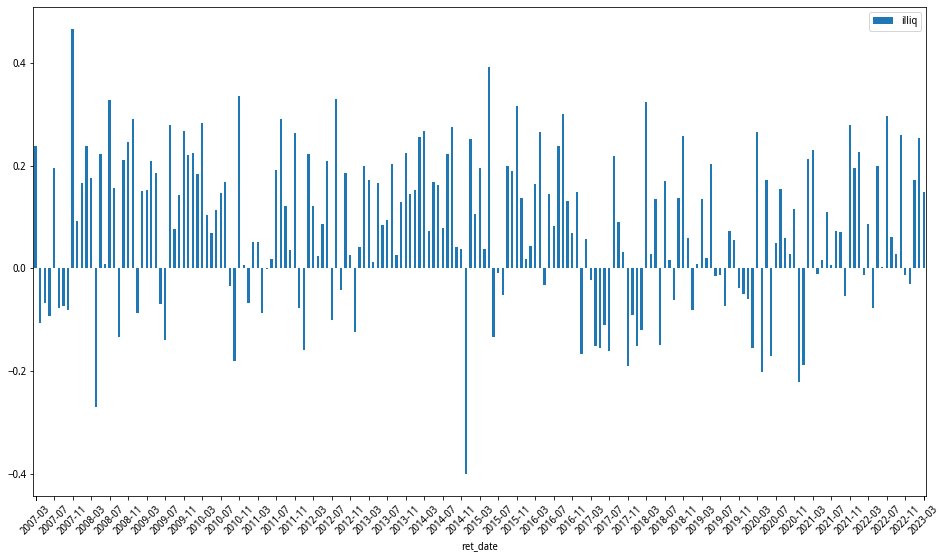

In [12]:
# fig, ax = plt.subplots()
# plt.bar(ic_illiq.index, ic_illiq['illiq'])
# plt.gca().xaxis.set_major_locator(dates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
# # fig.autofmt_xdate()
# plt.show()
ax = ic_illiq.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
# ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
plt.show()

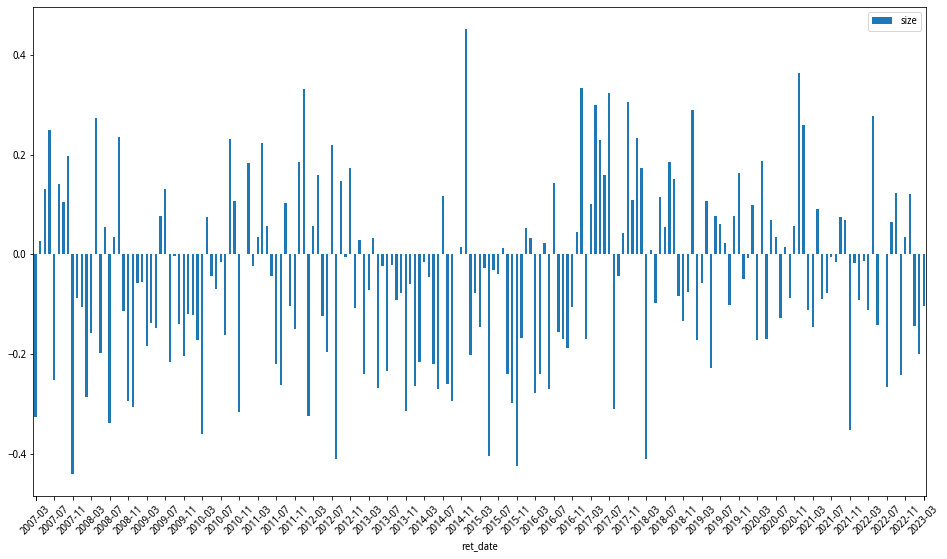

In [13]:
ic_size = ret_df.groupby('ret_date')[['exret','size']].corr(method='spearman')
ic_size.reset_index(inplace=True)
ic_size = ic_size[ic_size['level_1'] != 'size'].drop(['exret','level_1'],axis=1)
ic_size.set_index('ret_date',inplace=True)
ax = ic_size.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

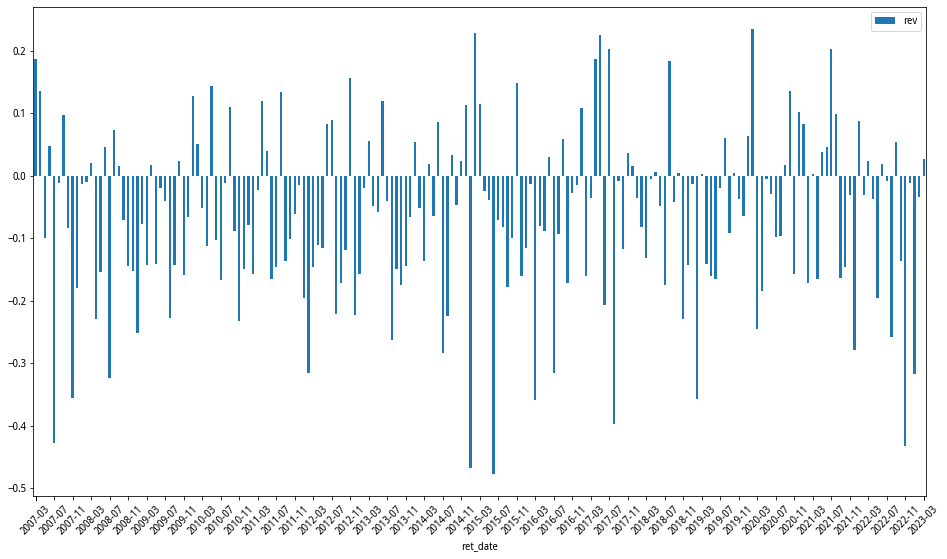

In [14]:
ic_rev = ret_df.groupby('ret_date')[['exret','rev']].corr(method='spearman')
ic_rev.reset_index(inplace=True)
ic_rev = ic_rev[ic_rev['level_1'] != 'rev'].drop(['exret','level_1'],axis=1)
ic_rev.set_index('ret_date',inplace=True)
ax = ic_rev.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

In [15]:
cols = ['beta','size','bm','mom','rev','illiq','ivol']
ic_df = pd.DataFrame()
for col in cols:
    temp = ret_df.groupby('ret_date')[['exret',col]].corr(method='spearman')
    temp.reset_index(inplace=True)
    ic_df[col] = temp[temp['level_1'] != col].drop(['exret','level_1','ret_date'],axis=1)[col].values

In [16]:
ic_df.index = np.sort(ret_df['ret_date'].unique().dropna())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb41e6ef490>,
      dtype=object)

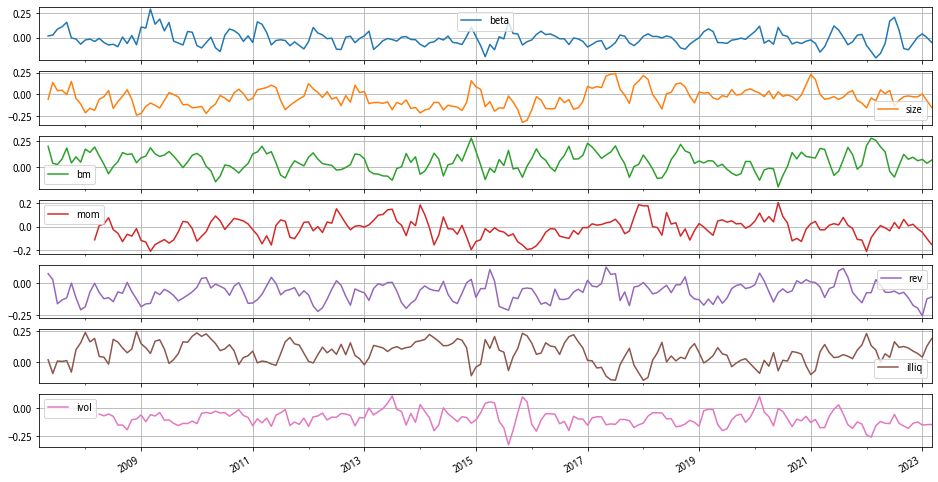

In [17]:
ic_df[cols].rolling(3).mean().plot(subplots=True,grid=True)

information ratio = IC.mean()/IC.std()

In [18]:
# Information ratio
ic_df.apply(lambda x: x.mean()/x.std())

beta    -0.066689
size    -0.230539
bm       0.346717
mom     -0.115771
rev     -0.477787
illiq    0.542586
ivol    -0.714385
dtype: float64

# Fund performance

## Fund return data

In [19]:
START = '2007-01-01'
END = '2023-03-31'
# Security Id
fund_info = DataAPI.SecIDGet(assetClass="F",pandas="1")

In [20]:
fund_info

secID  ticker           secShortName               cnSpell  \
0      000001.OFCN  000001                   华夏成长                  HXCZ   
1      000003.OFCN  000003              中海可转债债券-A             ZHKZZZQ-A   
2      000004.OFCN  000004              中海可转债债券-C             ZHKZZZQ-C   
3      000005.OFCN  000005             嘉实增强信用定开债券            JSZQXYDKZQ   
4      000006.OFCN  000006           西部利得量化成长混合-A          XBLDLHCZHH-A   
5      000007.OFCN  000007              鹏华国有企业债债券             PHGYQYZZQ   
6      000008.OFCN  000008         嘉实中证500ETF联接-A        JSZZ500ETFLJ-A   
7      000009.OFCN  000009            易方达天天理财货币-A           YFDTTLCHB-A   
...            ...     ...                    ...                   ...   
24319  970202.OFCN  970202          银河水星聚利中短债债券-C         YHSXJLZDZZQ-C   
24320  970203.OFCN  970203          银河水星聚利中短债债券-E         YHSXJLZDZZQ-E   
24321  970204.OFCN  970204  兴证资管金麒麟兴享增利六个月持有期债券-A  XZZGJQLXXZLLGYCYQ...   
24322  970205.OFCN  970205  兴证资管金麒麟兴享增利六个月持有期债券-C  XZZGJQLXXZLLGYCYQ...   
24323  970206.OFCN  970206         中金优势领航一年持有混合-C        ZJYSLHYNCYHH-C   
24324  970207.OFCN  970207               国信睿丰债券-C              GXRFZQ-C   
24325  970208.OFCN  970208    国信经典组合三个月持有期混合(FOF)   GXJDZHSGYCYQHH(FOF)   
24326  980003.OFCN  980003         太平洋证券六个月滚动持有债券        TPYZQLGYGDCYZQ   

      exchangeCD assetClass listStatusCD listDate transCurrCD ISIN  partyID  \
0            NaN          F           UN      NaN         CNY  NaN  26812.0   
1            NaN          F           UN      NaN         CNY  NaN  16550.0   
2            NaN          F           UN      NaN         CNY  NaN  16550.0   
3            NaN          F           UN      NaN         CNY  NaN  26817.0   
4            NaN          F           UN      NaN         CNY  NaN  40283.0   
5            NaN          F           UN      NaN         CNY  NaN  26816.0   
6            NaN          F           UN      NaN         CNY  NaN  26817.0   
7            NaN          F           UN      NaN         CNY  NaN  26932.0   
...          ...        ...          ...      ...         ...  ...      ...   
24319        NaN          F           UN      NaN         CNY  NaN  89520.0   
24320        NaN          F           UN      NaN         CNY  NaN  89520.0   
24321        NaN          F           UN      NaN         CNY  NaN  92237.0   
24322        NaN          F           UN      NaN         CNY  NaN  92237.0   
24323        NaN          F           UN      NaN         CNY  NaN  26455.0   
24324        NaN          F           UN      NaN         CNY  NaN  26500.0   
24325        NaN          F           UN      NaN         CNY  NaN  26500.0   
24326        NaN          F           UN      NaN         CNY  NaN  27776.0   

      delistDate  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
5            NaN  
6            NaN  
7            NaN  
...          ...  
24319        NaN  
24320        NaN  
24321        NaN  
24322        NaN  
24323        NaN  
24324        NaN  
24325        NaN  
24326        NaN  

[24327 rows x 12 columns]

In [21]:
# fund_id = ['110022','009550','001938','009341',
#            '000751','004997','009863','001714',
#            '001410','004851','005827','110011',
#            '260108','163402','320007','163417',
#            '001511','161728','161005','161131']
fund_id =["519212","519191","519185","001678",
          "004685","001437","519198","002049",
          "010761","000398","011891","001470",
          "166301","008488","006195","002601",
          "001959","011403","013142","001763"]
# fund_id = [id_+'.OFCN' for id_ in fund_id]

In [22]:
fund_name = fund_info.loc[fund_info['ticker'].isin(fund_id),['ticker','secShortName']]
fund_name

ticker       secShortName
382    000398           华富恒鑫债券-A
383    000398           华富灵活配置混合
1389   001437      易方达瑞享灵活配置混合-I
1417   001470         融通通鑫灵活配置混合
1641   001678         英大国企改革主题股票
1729   001763        广发多策略灵活配置混合
1931   001959     华商乐享互联灵活配置混合-A
2014   002049        融通新机遇灵活配置混合
...       ...                ...
20667  166301        华商中证500指数分级
20668  166301      华商新趋势优选灵活配置混合
23003  519185           万家精选混合-A
23010  519191       万家城市建设主题纯债债券
23011  519191         万家新利灵活配置混合
23018  519198           万家颐和保本混合
23019  519198       万家颐和灵活配置混合-A
23030  519212  万家宏观择时多策略灵活配置混合-A

[25 rows x 2 columns]

In [25]:
fund_name.loc[~fund_name['secShortName'].str.contains('债')]

ticker       secShortName
383    000398           华富灵活配置混合
1389   001437      易方达瑞享灵活配置混合-I
1417   001470         融通通鑫灵活配置混合
1641   001678         英大国企改革主题股票
1729   001763        广发多策略灵活配置混合
1931   001959     华商乐享互联灵活配置混合-A
2014   002049        融通新机遇灵活配置混合
2626   002601         中银证券保本1号混合
...       ...                ...
13091  013142     华商乐享互联灵活配置混合-C
20667  166301        华商中证500指数分级
20668  166301      华商新趋势优选灵活配置混合
23003  519185           万家精选混合-A
23011  519191         万家新利灵活配置混合
23018  519198           万家颐和保本混合
23019  519198       万家颐和灵活配置混合-A
23030  519212  万家宏观择时多策略灵活配置混合-A

[23 rows x 2 columns]

In [26]:
fund_name = fund_name.loc[~fund_name['secShortName'].str.contains('债')].copy()

In [30]:
fund_name.loc[fund_name.duplicated('ticker',keep=False)] # keep='last'

ticker    secShortName
2626   002601      中银证券保本1号混合
2627   002601  中银证券价值精选灵活配置混合
20667  166301     华商中证500指数分级
20668  166301   华商新趋势优选灵活配置混合
23018  519198        万家颐和保本混合
23019  519198    万家颐和灵活配置混合-A

In [31]:
fund_name = fund_name.drop_duplicates('ticker',keep='last')
fund_name

ticker       secShortName
383    000398           华富灵活配置混合
1389   001437      易方达瑞享灵活配置混合-I
1417   001470         融通通鑫灵活配置混合
1641   001678         英大国企改革主题股票
1729   001763        广发多策略灵活配置混合
1931   001959     华商乐享互联灵活配置混合-A
2014   002049        融通新机遇灵活配置混合
2627   002601     中银证券价值精选灵活配置混合
...       ...                ...
11384  011403         融通鑫新成长混合-A
11862  011891        易方达先锋成长混合-A
13091  013142     华商乐享互联灵活配置混合-C
20668  166301      华商新趋势优选灵活配置混合
23003  519185           万家精选混合-A
23011  519191         万家新利灵活配置混合
23019  519198       万家颐和灵活配置混合-A
23030  519212  万家宏观择时多策略灵活配置混合-A

[20 rows x 2 columns]

In [32]:
# Fund_NAV_Month.csv 从 CSMAR 下载
fund_df = pd.read_csv('./data/Fund_NAV_Month.csv',dtype={'Symbol':str})
fund_df

TradingDate TradingMonth  Symbol     NAV  ReturnNAV
0       2001-12-28      2001-12  000001  1.0000     0.0000
1       2002-01-31      2002-01  000001  1.0020     0.0020
2       2002-02-28      2002-02  000001  1.0130     0.0110
3       2002-03-31      2002-03  000001  1.0230     0.0099
4       2002-04-30      2002-04  000001  1.0460     0.0225
5       2002-05-31      2002-05  000001  1.0270    -0.0182
6       2002-06-30      2002-06  000001  1.0730     0.0448
7       2002-07-31      2002-07  000001  1.0450    -0.0261
...            ...          ...     ...     ...        ...
973746  2022-07-29      2022-07  980003  1.5449     0.0036
973747  2022-08-31      2022-08  980003  1.5492     0.0028
973748  2022-09-30      2022-09  980003  1.5513     0.0014
973749  2022-10-31      2022-10  980003  1.5550     0.0024
973750  2022-11-30      2022-11  980003  1.5504    -0.0030
973751  2022-12-31      2022-12  980003  1.5497    -0.0005
973752  2023-01-31      2023-01  980003  1.5562     0.0042
973753  2023-02-28      2023-02  980003  1.5620     0.0037

[973754 rows x 5 columns]

In [33]:
top_fund_df = fund_df[fund_df['Symbol'].isin(fund_id)].copy()

In [34]:
top_fund_df['Symbol'].nunique()

20

In [35]:
top_fund_df.rename(columns={'Symbol':'ticker','TradingMonth':'ret_date','ReturnNAV':'ret'},inplace=True)

In [36]:
top_fund_df = pd.merge(top_fund_df, fund_name, on='ticker')

In [37]:
top_fund_df = top_fund_df[['ret_date','ticker','secShortName','ret']].copy()

In [38]:
top_fund_df['ret_date'] = pd.to_datetime(top_fund_df['ret_date']).dt.to_period('M')

In [39]:
top_fund_df

ret_date  ticker       secShortName     ret
0     2013-12  000398           华富灵活配置混合  0.0000
1     2014-01  000398           华富灵活配置混合  0.0060
2     2014-02  000398           华富灵活配置混合  0.0000
3     2014-03  000398           华富灵活配置混合  0.0000
4     2014-04  000398           华富灵活配置混合  0.0000
5     2014-05  000398           华富灵活配置混合 -0.0010
6     2014-06  000398           华富灵活配置混合  0.0000
7     2014-07  000398           华富灵活配置混合  0.0020
...       ...     ...                ...     ...
1476  2022-07  519212  万家宏观择时多策略灵活配置混合-A -0.0656
1477  2022-08  519212  万家宏观择时多策略灵活配置混合-A  0.1172
1478  2022-09  519212  万家宏观择时多策略灵活配置混合-A  0.0571
1479  2022-10  519212  万家宏观择时多策略灵活配置混合-A -0.1186
1480  2022-11  519212  万家宏观择时多策略灵活配置混合-A  0.1016
1481  2022-12  519212  万家宏观择时多策略灵活配置混合-A -0.0917
1482  2023-01  519212  万家宏观择时多策略灵活配置混合-A  0.0603
1483  2023-02  519212  万家宏观择时多策略灵活配置混合-A  0.0494

[1484 rows x 4 columns]

## Factor return data

In [43]:
# factor_ret = pd.read_pickle('./output_data/factors/factors_all.pkl')
factor_ret = pd.read_pickle('./output_data/factors/factors_all_long_only.pkl')

In [44]:
factor_ret

rf  exmktret  small_only  high_only  rev_long  illiq_long  \
ret_date                                                                    
2008-02   0.002946  0.024010    0.103117   0.059319  0.061518    0.054128   
2008-03   0.002746 -0.195480   -0.180562  -0.202495 -0.167375   -0.180816   
2008-04   0.002862  0.022519   -0.073326  -0.010688  0.024523   -0.063553   
2008-05   0.002953 -0.080798   -0.020022  -0.056407 -0.041619   -0.061992   
2008-06   0.003113 -0.236014   -0.257252  -0.239010 -0.249352   -0.218804   
2008-07   0.002806  0.014972    0.108774   0.072304  0.086448    0.084925   
2008-08   0.002681 -0.170063   -0.232768  -0.187431 -0.203679   -0.206455   
2008-09   0.002889 -0.067913   -0.089285  -0.068049 -0.062323   -0.065761   
...            ...       ...         ...        ...       ...         ...   
2022-07   0.001448 -0.060974    0.047271   0.002560  0.015416    0.053249   
2022-08   0.001251 -0.023276   -0.034803  -0.009445 -0.010168   -0.017149   
2022-09   0.001426 -0.069642   -0.092335  -0.068136 -0.091581   -0.076478   
2022-10   0.001400 -0.056037    0.053699  -0.005541  0.025716    0.054459   
2022-11   0.001596  0.086374    0.078566   0.103273  0.126171    0.085286   
2022-12   0.001955 -0.010731   -0.041613  -0.040295 -0.043517   -0.031697   
2023-01   0.001856  0.071339    0.082598   0.065335  0.097496    0.081029   
2023-02   0.001910 -0.014930    0.038597   0.020645  0.020647    0.048121   

          ivol_long  
ret_date             
2008-02    0.060423  
2008-03   -0.152310  
2008-04   -0.024827  
2008-05   -0.054124  
2008-06   -0.224208  
2008-07    0.067996  
2008-08   -0.165454  
2008-09   -0.080529  
...             ...  
2022-07    0.000079  
2022-08    0.001741  
2022-09   -0.064587  
2022-10   -0.003383  
2022-11    0.101584  
2022-12   -0.020359  
2023-01    0.078637  
2023-02    0.028370  

[181 rows x 7 columns]

In [45]:
reg_df = pd.merge(factor_ret.reset_index(), top_fund_df, on='ret_date')

In [46]:
reg_df['exret'] = reg_df['ret']-reg_df['rf']

In [47]:
reg_df

ret_date        rf  exmktret  small_only  high_only  rev_long  \
0     2009-05  0.000856  0.053275    0.080352   0.064899  0.075171   
1     2009-06  0.001084  0.125271    0.051901   0.097641  0.070555   
2     2009-07  0.001461  0.169708    0.138242   0.188059  0.152335   
3     2009-08  0.001339 -0.228372   -0.149964  -0.194644 -0.156885   
4     2009-09  0.001453  0.055019    0.038860   0.047223  0.062708   
5     2009-10  0.001423  0.097346    0.120570   0.089273  0.102671   
6     2009-11  0.001438  0.086283    0.151819   0.110774  0.115158   
7     2009-12  0.001495  0.016683    0.027524   0.040946  0.041063   
...       ...       ...       ...         ...        ...       ...   
1476  2023-02  0.001910 -0.014930    0.038597   0.020645  0.020647   
1477  2023-02  0.001910 -0.014930    0.038597   0.020645  0.020647   
1478  2023-02  0.001910 -0.014930    0.038597   0.020645  0.020647   
1479  2023-02  0.001910 -0.014930    0.038597   0.020645  0.020647   
1480  2023-02  0.001910 -0.014930    0.038597   0.020645  0.020647   
1481  2023-02  0.001910 -0.014930    0.038597   0.020645  0.020647   
1482  2023-02  0.001910 -0.014930    0.038597   0.020645  0.020647   
1483  2023-02  0.001910 -0.014930    0.038597   0.020645  0.020647   

      illiq_long  ivol_long  ticker       secShortName     ret     exret  
0       0.088026   0.066976  519185           万家精选混合-A  0.0000 -0.000856  
1       0.040224   0.110701  519185           万家精选混合-A  0.0178  0.016716  
2       0.122264   0.157186  519185           万家精选混合-A  0.0819  0.080439  
3      -0.094146  -0.167813  519185           万家精选混合-A -0.1454 -0.146739  
4       0.030041   0.065954  519185           万家精选混合-A  0.0231  0.021647  
5       0.138699   0.108255  519185           万家精选混合-A  0.0520  0.050577  
6       0.156573   0.121608  519185           万家精选混合-A  0.0759  0.074462  
7       0.039160   0.047011  519185           万家精选混合-A  0.0524  0.050905  
...          ...        ...     ...                ...     ...       ...  
1476    0.048121   0.028370  011403         融通鑫新成长混合-A  0.0337  0.031790  
1477    0.048121   0.028370  011891        易方达先锋成长混合-A  0.0112  0.009290  
1478    0.048121   0.028370  013142     华商乐享互联灵活配置混合-C  0.0152  0.013290  
1479    0.048121   0.028370  166301      华商新趋势优选灵活配置混合  0.0195  0.017590  
1480    0.048121   0.028370  519185           万家精选混合-A  0.0176  0.015690  
1481    0.048121   0.028370  519191         万家新利灵活配置混合  0.0485  0.046590  
1482    0.048121   0.028370  519198       万家颐和灵活配置混合-A -0.0080 -0.009910  
1483    0.048121   0.028370  519212  万家宏观择时多策略灵活配置混合-A  0.0494  0.047490  

[1484 rows x 12 columns]

In [48]:
# results = {}
# for fund in fund_id:
#     df_ = reg_df[reg_df['ticker'] == fund].copy()
#     X = df_[['exmktret','SMB','HML','rev','illiq','ivol']]
#     y = df_['exret']
#     X = sm.add_constant(X)
#     reg = sm.OLS(y, X).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
#     results[fund] = pd.DataFrame([reg.params,reg.tvalues],columns=['alpha','exmktret','SMB','HML','rev','illiq','ivol'],
#                                   index=['coefs','tvalues'])
results = {}
for fund in fund_id:
    df_ = reg_df[reg_df['ticker'] == fund].copy()
    X = df_[['exmktret','small_only','high_only','rev_long','illiq_long','ivol_long']]
    y = df_['exret']
    X = sm.add_constant(X)
    reg = sm.OLS(y, X).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
    results[fund] = pd.DataFrame([reg.params,reg.tvalues],columns=['alpha','exmktret','small_only','high_only','rev_long','illiq_long','ivol_long'],
                                  index=['coefs','tvalues'])

In [49]:
for fund in fund_id[0:10]:
    print(fund_name.loc[fund_name['ticker']==fund,'secShortName'].values)
    display(results[fund])
print('#################'*5)
for fund in fund_id[10:20]:
    print(fund_name.loc[fund_name['ticker']==fund,'secShortName'].values)
    display(results[fund])

['万家宏观择时多策略灵活配置混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.010497 -0.206582   -0.610244   2.447447  0.017941   -0.588562   
tvalues  1.232777 -0.560278   -1.524916   3.722819  0.039219   -0.860851   

         ivol_long  
coefs     0.045130  
tvalues   0.075024

['万家新利灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs   -0.002476 -0.336495   -0.844814   1.385605  0.584571    0.032781   
tvalues -0.436076 -1.282650   -3.129796   2.393759  2.496582    0.124136   

         ivol_long  
coefs    -0.246791  
tvalues  -0.537431

['万家精选混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs   -0.002618  0.068723   -0.353119   1.078448  0.097179    0.406215   
tvalues -0.458081  0.325436   -1.037126   2.053734  0.380632    1.970523   

         ivol_long  
coefs    -0.529078  
tvalues  -1.183116

['英大国企改革主题股票']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.014991  0.145549   -0.908717   1.918711  0.183407   -0.007997   
tvalues  2.907219  0.274222   -1.453665   2.077449  0.346142   -0.012680   

         ivol_long  
coefs    -0.621036  
tvalues  -0.499034

['金元顺安元启灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.00848 -0.669684    0.246539   -0.26073 -0.145559   -0.437510   
tvalues  1.96532 -4.018245    1.141861   -0.82852 -0.478742   -1.879923   

         ivol_long  
coefs     1.798049  
tvalues   3.641904

['易方达瑞享灵活配置混合-I']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.014415  0.858791    0.837726  -1.409466  0.346023   -0.694275   
tvalues  2.470850  3.772549    1.949522  -2.208417  1.163403   -2.028463   

         ivol_long  
coefs     0.528122  
tvalues   0.841435

['万家颐和灵活配置混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.003497  0.115514    0.370851  -0.069395  0.003730   -1.136388   
tvalues  0.720215  0.414512    0.661258  -0.146638  0.010688   -1.549706   

         ivol_long  
coefs     1.200380  
tvalues   1.999808

['融通新机遇灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.003205  0.306104    0.175955  -0.746770 -0.105400    0.027693   
tvalues  2.002657  3.600297    2.105911  -2.793349 -0.848659    0.205485   

         ivol_long  
coefs     0.430514  
tvalues   1.971590

['华商甄选回报混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.023382  0.462472    0.464071   1.293159 -0.099879   -0.310726   
tvalues  4.680356  1.514903    0.893241   2.050985 -0.234196   -0.528831   

         ivol_long  
coefs    -1.224209  
tvalues  -1.630596

['华富灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs   -0.005439  0.032474    0.007034  -0.609529  0.025002   -0.003677   
tvalues -1.769913  0.266630    0.042200  -2.159401  0.151950   -0.026530   

         ivol_long  
coefs     0.684485  
tvalues   2.837303

#####################################################################################
['易方达先锋成长混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.032607  1.754048    0.564110  -0.510332 -0.540656   -0.033667   
tvalues  2.363411  4.152835    2.528363  -0.799157 -1.413832   -0.078767   

         ivol_long  
coefs    -0.061873  
tvalues  -0.080384

['融通通鑫灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.002050  0.296478    0.218115  -0.828293 -0.082376   -0.083874   
tvalues  1.403351  4.093058    2.526605  -3.436369 -0.762420   -1.235659   

         ivol_long  
coefs     0.579945  
tvalues   2.654838

['华商新趋势优选灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.017605  0.790138    0.568941   0.132722 -0.036199    0.286494   
tvalues  3.728112  6.095838    2.071596   0.363574 -0.150848    1.427699   

         ivol_long  
coefs    -1.030145  
tvalues  -3.153369

['华商恒益稳健混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.007453  0.746374    0.029580   0.308606  0.203711    0.006181   
tvalues  0.641712  2.212055    0.042307   0.338450  0.316152    0.005387   

         ivol_long  
coefs    -0.788741  
tvalues  -0.876881

['国金量化多因子股票-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.002677  0.100342    0.542134  -0.250632 -0.034863   -0.077470   
tvalues  0.578199  0.492219    3.212860  -0.624488 -0.223508   -0.256979   

         ivol_long  
coefs     0.497719  
tvalues   1.360311

['中银证券价值精选灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.010664  0.498109    0.310263   0.993757 -0.395033   -0.053401   
tvalues  1.452479  1.399650    0.628019   1.191792 -0.578988   -0.112089   

         ivol_long  
coefs    -0.845222  
tvalues  -1.047846

['华商乐享互联灵活配置混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.019744  1.250969    0.530879   0.362456 -0.232501    0.754730   
tvalues  2.890570  6.272974    1.081199   0.637677 -0.545681    1.959244   

         ivol_long  
coefs     -1.89323  
tvalues   -4.09600

['融通鑫新成长混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.012017  0.273755    0.467057  -0.034306  0.255366    0.088869   
tvalues  1.046661  0.717819    0.815775  -0.067085  0.404843    0.200987   

         ivol_long  
coefs    -0.028380  
tvalues  -0.044388

['华商乐享互联灵活配置混合-C']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.028107  1.247524   -0.340017   3.028649 -0.089862    1.440470   
tvalues  2.668820  2.834247   -1.144474   3.823011 -0.251233    3.022528   

         ivol_long  
coefs    -3.951532  
tvalues  -3.320381

['广发多策略灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.003139  0.389336   -0.541077   0.271406 -0.055775    0.469419   
tvalues  0.800473  2.686808   -2.291280   0.818223 -0.258665    1.757023   

         ivol_long  
coefs     0.172788  
tvalues   0.437295